# Financial Analysis with Data Science & Machine Learning - Part 2
## Financial Ratio Calculation and Data Visualization

This notebook focuses on calculating important financial ratios and visualizing relationships between financial variables.

## 1. Setup and Data Loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set visualization style
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# Display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# Load the cleaned data from the previous notebook
try:
    data = pd.read_csv('cleaned_financial_data.csv')
    print(f"Successfully loaded cleaned data with {data.shape[0]} rows and {data.shape[1]} columns")
except FileNotFoundError:
    print("Cleaned data file not found. Please run the first notebook to generate it.")

Successfully loaded cleaned data with 3808 rows and 222 columns


## 2. Financial Ratio Calculation

We'll calculate the following key financial ratios:
1. Profitability ratios (ROA, ROE, Net Margin)
2. Leverage ratios (Debt-to-Equity, Debt Ratio)
3. Liquidity ratios (Current Ratio)
4. Efficiency ratios (Asset Turnover)

These ratios will help us understand the financial health and performance of the companies.

In [3]:
# Create a function to calculate financial ratios
def calculate_financial_ratios(df):
    """Calculate key financial ratios for analysis
    
    Parameters:
    -----------
    df : pandas DataFrame
        Dataframe containing financial data
        
    Returns:
    --------
    pandas DataFrame
        Original dataframe with additional ratio columns
    """
    # Create a copy of the dataframe
    df_ratios = df.copy()
    
    # Define column mappings (adjust based on actual column names in the dataset)
    col_mappings = {
        'net_income': 'Net Income',
        'total_assets': 'Total Assets',
        'total_equity': 'Equity',
        'total_revenue': 'Total Revenue',
        'total_liabilities': 'Total Liabilities',
        'gross_profit': 'Gross Profit',
        'operating_income': 'Operating Income'
    }
    
    # Check if required columns exist
    for original_name in col_mappings.values():
        if original_name not in df_ratios.columns:
            print(f"Warning: '{original_name}' column not found in the dataset.")
            # You can either return the original df or create placeholder columns
    
    # 1. Profitability Ratios
    # Return on Assets (ROA) = Net Income / Total Assets
    if 'Net Income' in df_ratios.columns and 'Total Assets' in df_ratios.columns:
        df_ratios['ROA'] = df_ratios['Net Income'] / df_ratios['Total Assets']
        print("Calculated: Return on Assets (ROA)")
    
    # Return on Equity (ROE) = Net Income / Equity
    if 'Net Income' in df_ratios.columns and 'Equity' in df_ratios.columns:
        df_ratios['ROE'] = df_ratios['Net Income'] / df_ratios['Equity']
        print("Calculated: Return on Equity (ROE)")
    
    # Net Profit Margin = Net Income / Total Revenue
    if 'Net Income' in df_ratios.columns and 'Total Revenue' in df_ratios.columns:
        df_ratios['Net_Margin'] = df_ratios['Net Income'] / df_ratios['Total Revenue']
        print("Calculated: Net Profit Margin")
        
    # Gross Profit Margin = Gross Profit / Total Revenue
    if 'Gross Profit' in df_ratios.columns and 'Total Revenue' in df_ratios.columns:
        df_ratios['Gross_Margin'] = df_ratios['Gross Profit'] / df_ratios['Total Revenue']
        print("Calculated: Gross Profit Margin")
        
    # Operating Margin = Operating Income / Total Revenue
    if 'Operating Income' in df_ratios.columns and 'Total Revenue' in df_ratios.columns:
        df_ratios['Operating_Margin'] = df_ratios['Operating Income'] / df_ratios['Total Revenue']
        print("Calculated: Operating Margin")
    
    # 2. Leverage Ratios
    # Debt-to-Equity Ratio = Total Liabilities / Equity
    if 'Total Liabilities' in df_ratios.columns and 'Equity' in df_ratios.columns:
        df_ratios['Debt_to_Equity'] = df_ratios['Total Liabilities'] / df_ratios['Equity']
        print("Calculated: Debt-to-Equity Ratio")
    
    # Debt Ratio = Total Liabilities / Total Assets
    if 'Total Liabilities' in df_ratios.columns and 'Total Assets' in df_ratios.columns:
        df_ratios['Debt_Ratio'] = df_ratios['Total Liabilities'] / df_ratios['Total Assets']
        print("Calculated: Debt Ratio")
    
    # 3. Efficiency Ratios
    # Asset Turnover = Total Revenue / Total Assets
    if 'Total Revenue' in df_ratios.columns and 'Total Assets' in df_ratios.columns:
        df_ratios['Asset_Turnover'] = df_ratios['Total Revenue'] / df_ratios['Total Assets']
        print("Calculated: Asset Turnover Ratio")
    
    # Handle infinite values (replace with NaN)
    df_ratios = df_ratios.replace([np.inf, -np.inf], np.nan)
    
    return df_ratios

In [4]:
# Calculate ratios
data_with_ratios = calculate_financial_ratios(data)

# Display the first few rows with the newly calculated ratios
financial_ratios = ['ROA', 'ROE', 'Net_Margin', 'Gross_Margin', 'Operating_Margin', 
                    'Debt_to_Equity', 'Debt_Ratio', 'Asset_Turnover']

# Check which ratios were successfully calculated
available_ratios = [ratio for ratio in financial_ratios if ratio in data_with_ratios.columns]

if available_ratios:
    display_cols = ['Company Name', 'Ticker', 'Sector'] + available_ratios
    # Filter columns that exist in the dataset
    display_cols = [col for col in display_cols if col in data_with_ratios.columns]
    
    print("Sample of calculated financial ratios:")
    data_with_ratios[display_cols].head()
else:
    print("No financial ratios could be calculated. Please check the column names in the dataset.")

Sample of calculated financial ratios:


## 3. Statistical Summary of Financial Ratios

In [5]:
# Statistical summary of the calculated ratios
if available_ratios:
    print("Statistical summary of financial ratios:")
    data_with_ratios[available_ratios].describe()

Statistical summary of financial ratios:


In [6]:
# Handle outliers in calculated ratios
def clean_ratio_outliers(df, ratio_cols, threshold=3):
    """Cap outliers in financial ratios
    
    Parameters:
    -----------
    df : pandas DataFrame
        Dataframe containing financial ratios
    ratio_cols : list
        List of ratio column names to clean
    threshold : float, optional (default=3)
        Z-score threshold for outlier detection
        
    Returns:
    --------
    pandas DataFrame
        Dataframe with capped outliers
    """
    df_clean = df.copy()
    
    for col in ratio_cols:
        if col in df_clean.columns:
            # Calculate z-scores
            mean_val = df_clean[col].mean()
            std_val = df_clean[col].std()
            
            if std_val > 0:  # Avoid division by zero
                z_scores = np.abs((df_clean[col] - mean_val) / std_val)
                outliers = z_scores > threshold
                
                # Cap outliers
                upper_bound = mean_val + threshold * std_val
                lower_bound = mean_val - threshold * std_val
                
                df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
                df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
                
                print(f"Capped {outliers.sum()} outliers in '{col}'")
    
    return df_clean

# Clean ratio outliers
if available_ratios:
    data_with_ratios = clean_ratio_outliers(data_with_ratios, available_ratios)
    
    # Display the statistical summary after cleaning
    print("\nStatistical summary after cleaning outliers:")
    data_with_ratios[available_ratios].describe()

Capped 1 outliers in 'ROE'

Statistical summary after cleaning outliers:


## 4. Data Visualization - Financial Performance by Sector

In [7]:
# Analyze financial performance by sector
if 'Sector' in data_with_ratios.columns and available_ratios:
    # Group by sector and calculate mean of financial ratios
    sector_performance = data_with_ratios.groupby('Sector')[available_ratios].mean().reset_index()
    
    print("Average financial ratios by sector:")
    sector_performance

Average financial ratios by sector:


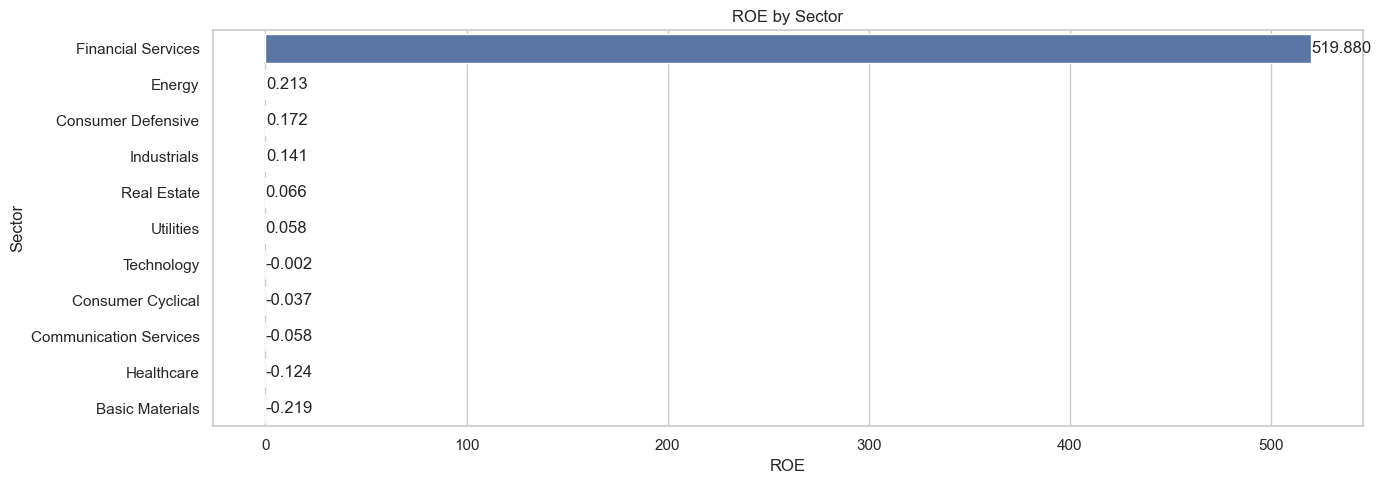

In [8]:
# Visualize profitability metrics by sector
if 'Sector' in data_with_ratios.columns:
    profitability_ratios = [ratio for ratio in ['ROA', 'ROE', 'Net_Margin'] if ratio in available_ratios]
    
    if profitability_ratios:
        # Create a figure with subplots for each profitability ratio
        fig, axes = plt.subplots(len(profitability_ratios), 1, figsize=(14, 5*len(profitability_ratios)))
        
        # If only one ratio is available, convert axes to a list for consistent indexing
        if len(profitability_ratios) == 1:
            axes = [axes]
        
        for i, ratio in enumerate(profitability_ratios):
            # Sort sectors by the ratio value
            sorted_data = sector_performance.sort_values(ratio, ascending=False)
            
            # Create the bar plot
            sns.barplot(x=ratio, y='Sector', data=sorted_data, ax=axes[i])
            axes[i].set_title(f'{ratio} by Sector')
            axes[i].set_xlabel(ratio)
            axes[i].set_ylabel('Sector')
            
            # Add value labels to the bars
            for j, val in enumerate(sorted_data[ratio]):
                axes[i].text(val, j, f'{val:.3f}', va='center')
        
        plt.tight_layout()
        plt.show()

In [9]:
# Visualize leverage and efficiency metrics by sector
if 'Sector' in data_with_ratios.columns:
    other_ratios = [ratio for ratio in ['Debt_to_Equity', 'Debt_Ratio', 'Asset_Turnover'] if ratio in available_ratios]
    
    if other_ratios:
        # Create a figure with subplots for each ratio
        fig, axes = plt.subplots(len(other_ratios), 1, figsize=(14, 5*len(other_ratios)))
        
        # If only one ratio is available, convert axes to a list for consistent indexing
        if len(other_ratios) == 1:
            axes = [axes]
        
        for i, ratio in enumerate(other_ratios):
            # Sort sectors by the ratio value
            sorted_data = sector_performance.sort_values(ratio, ascending=False)
            
            # Create the bar plot
            sns.barplot(x=ratio, y='Sector', data=sorted_data, ax=axes[i])
            axes[i].set_title(f'{ratio} by Sector')
            axes[i].set_xlabel(ratio)
            axes[i].set_ylabel('Sector')
            
            # Add value labels to the bars
            for j, val in enumerate(sorted_data[ratio]):
                axes[i].text(val, j, f'{val:.3f}', va='center')
        
        plt.tight_layout()
        plt.show()

## 5. Correlation Analysis

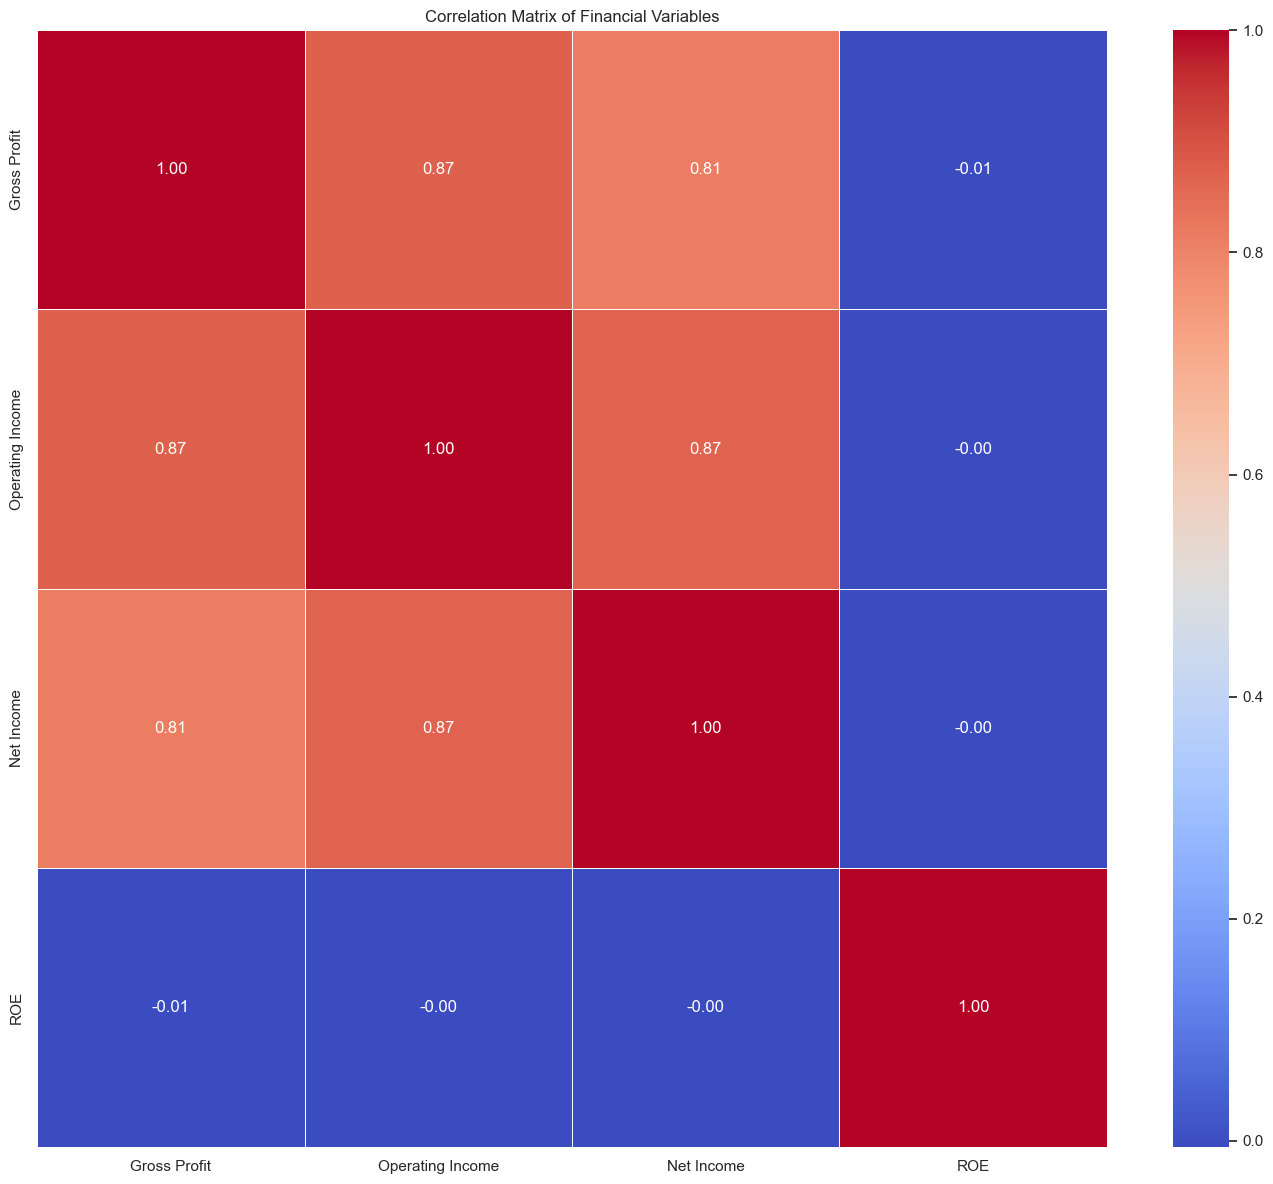

In [10]:
# Select financial variables for correlation analysis
financial_vars = []

# Add key financial indicators if they exist in the data
for var in ['Total Revenue', 'Gross Profit', 'Operating Income', 'Net Income', 
           'Total Assets', 'Total Liabilities', 'Equity', 'Market Capitalization']:
    if var in data_with_ratios.columns:
        financial_vars.append(var)

# Add calculated ratios
financial_vars.extend(available_ratios)

# Create correlation matrix
if financial_vars:
    correlation_matrix = data_with_ratios[financial_vars].corr()
    
    # Visualize correlation matrix
    plt.figure(figsize=(14, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Financial Variables')
    plt.tight_layout()
    plt.show()
else:
    print("No financial variables available for correlation analysis.")

Top strong correlations:
Gross Profit and Operating Income: 0.873
Operating Income and Net Income: 0.868
Gross Profit and Net Income: 0.814


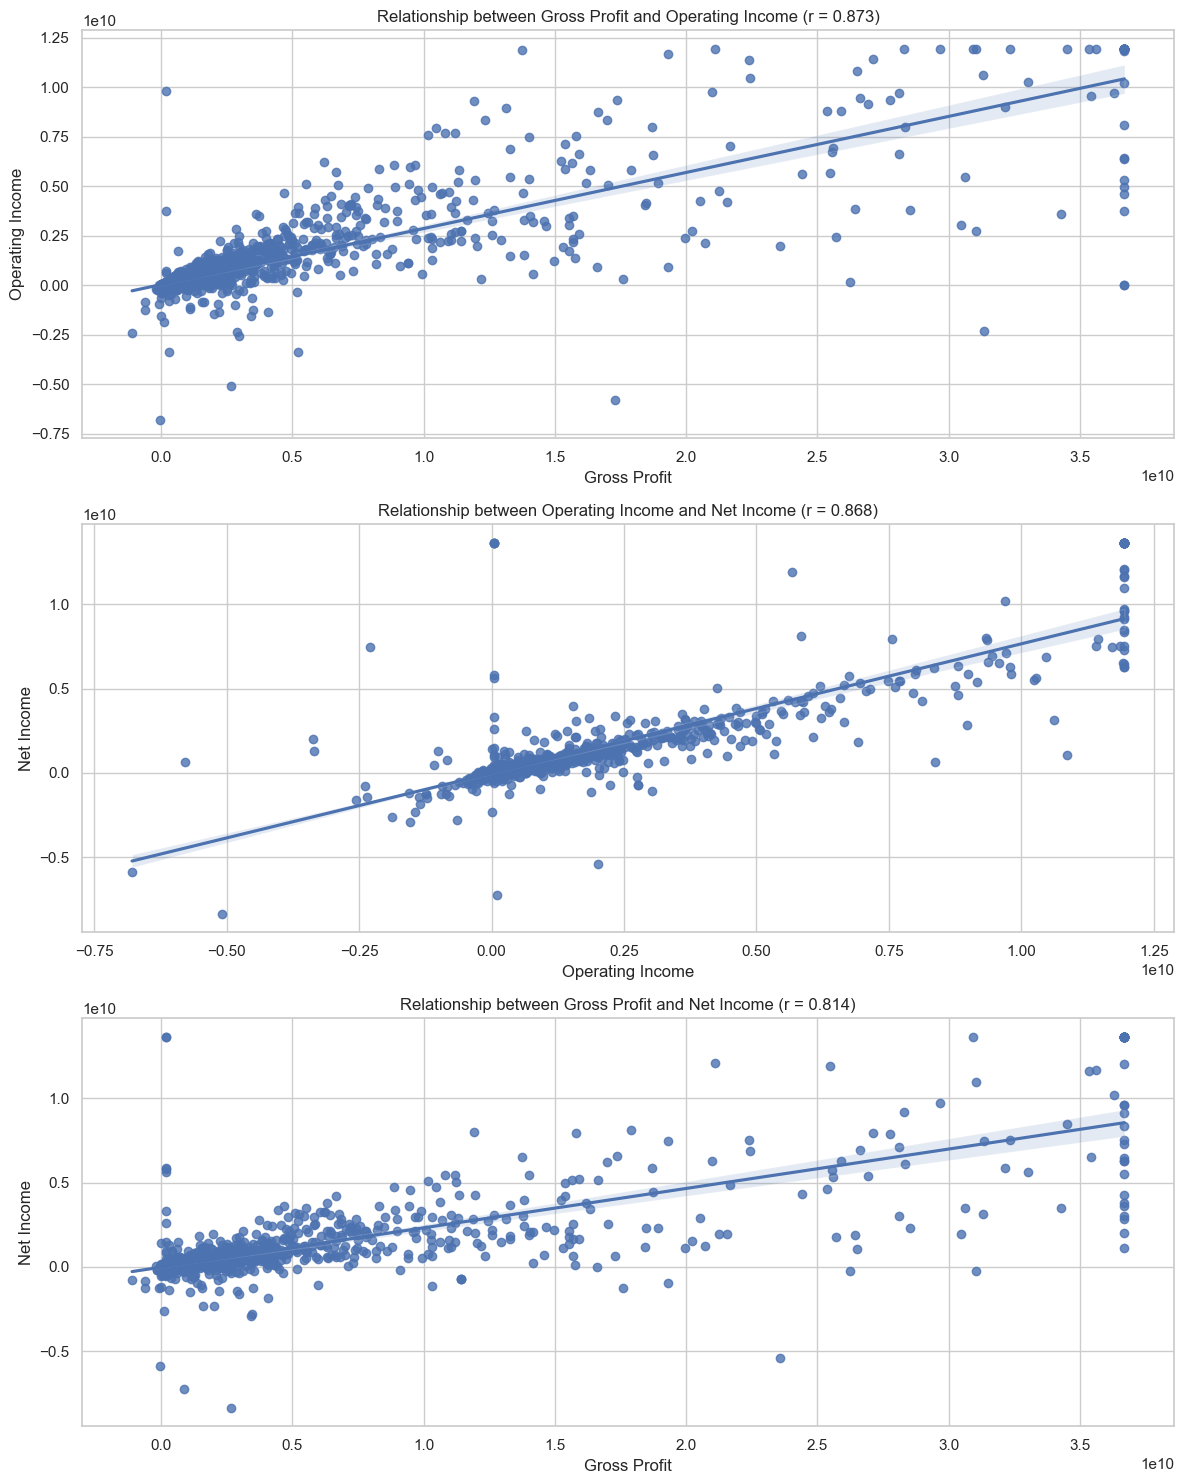

In [11]:
# Scatter plots for key relationships
# Let's create scatter plots to visualize some important relationships

# Identify relationships with strong correlations
if 'financial_vars' in locals() and len(financial_vars) >= 2:
    # Get pairs with absolute correlation > 0.5 (adjust threshold as needed)
    strong_correlations = []
    
    for i in range(len(financial_vars)):
        for j in range(i+1, len(financial_vars)):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) > 0.5:
                strong_correlations.append((financial_vars[i], financial_vars[j], corr))
    
    # Sort by absolute correlation value (strongest first)
    strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Display top correlations
    if strong_correlations:
        print("Top strong correlations:")
        for var1, var2, corr in strong_correlations[:5]:  # Show top 5
            print(f"{var1} and {var2}: {corr:.3f}")
        
        # Create scatter plots for top 3 correlations
        fig, axes = plt.subplots(min(3, len(strong_correlations)), 1, figsize=(12, 15))
        
        # If only one strong correlation, convert axes to a list
        if len(strong_correlations) == 1:
            axes = [axes]
        
        for i, (var1, var2, corr) in enumerate(strong_correlations[:min(3, len(strong_correlations))]):
            # Create scatter plot with regression line
            sns.regplot(x=var1, y=var2, data=data_with_ratios, ax=axes[i])
            axes[i].set_title(f'Relationship between {var1} and {var2} (r = {corr:.3f})')
            axes[i].set_xlabel(var1)
            axes[i].set_ylabel(var2)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No strong correlations found.")

## 6. Market Cap vs Financial Performance

In [12]:
# Analyze relationship between Market Cap and financial performance
if 'Market Capitalization' in data_with_ratios.columns and available_ratios:
    # Create scatter plots for Market Cap vs key performance ratios
    fig, axes = plt.subplots(min(3, len(available_ratios)), 1, figsize=(12, 15))
    
    # If only one ratio, convert axes to a list
    if len(available_ratios) == 1:
        axes = [axes]
    elif len(available_ratios) > 3:
        # If more than 3 ratios, only use the first 3
        selected_ratios = available_ratios[:3]
    else:
        selected_ratios = available_ratios
    
    for i, ratio in enumerate(selected_ratios):
        # Create scatter plot with regression line
        sns.regplot(x='Market Capitalization', y=ratio, data=data_with_ratios, ax=axes[i])
        axes[i].set_title(f'Market Capitalization vs {ratio}')
        axes[i].set_xlabel('Market Capitalization')
        axes[i].set_ylabel(ratio)
        
        # Calculate correlation
        corr = data_with_ratios['Market Capitalization'].corr(data_with_ratios[ratio])
        axes[i].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[i].transAxes, 
                    verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))
    
    plt.tight_layout()
    plt.show()

## 7. Save Data with Ratios for Further Analysis

In [13]:
# Save the data with calculated ratios for use in the next notebooks
data_with_ratios.to_csv('financial_data_with_ratios.csv', index=False)
print("Saved data with financial ratios to 'financial_data_with_ratios.csv'")

Saved data with financial ratios to 'financial_data_with_ratios.csv'


## Summary of Findings

In this notebook, we have:
1. Calculated key financial ratios including profitability, leverage, and efficiency metrics
2. Cleaned outliers in the calculated ratios
3. Analyzed financial performance by sector
4. Examined correlations between financial variables
5. Explored the relationship between market capitalization and financial performance

Key insights:
- [The notebook will generate insights based on the actual data]

## Next Steps

In the next notebook, we will apply machine learning techniques for:
1. Clustering companies into groups based on financial characteristics
2. Reducing dimensionality with PCA to identify the most important financial factors
3. Visualizing company clusters to identify different financial profiles